# **Laboratorio N°4: Número de Condición**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [7]:
A = np.array([[1,2,3],[1.01,2.00003,2.899999], [0.97, 2,3.3]])
B = np.array([[1,1,1],[1,2,2], [1,2,3]])

kA = np.linalg.cond(A)
kB = np.linalg.cond(B)
kAuB = np.linalg.cond(A+B)

print("cond A + B : ", kAuB)
print("cond(A) : ", kA)
print("cond(B) : ", kB)


cond A + B :  33.96173852760204
cond(A) :  682434.0333183279
cond(B) :  16.393731622284367


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [8]:
A = np.array([[2,3,4],[2.01,3.00003,3.899999], [1.97, 3,4.3]])
B = np.array([[1,1,1],[1,2,2], [1,2,3]])

kA = np.linalg.cond(A)
kB = np.linalg.cond(B)
kAminusB = np.linalg.cond(A-B)

print("cond A - B : ", kAminusB)
print("cond(A) : ", kA)
print("cond(B) : ", kB)

cond A + B :  20.090033027607745
cond(A) :  852655.282040249
cond(B) :  16.393731622284367


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [37]:
A = np.array([[1,2,3],[1.01,2.00003,2.899999], [0.97, 2,3.3]])
B = np.array([[1,1,1],[1,2,2], [1,2,3]])

kA = np.linalg.cond(A)
kB = np.linalg.cond(B)
kAxB = np.linalg.cond(A*B)
print(A*B)
print("cond A*B : ", kAxB)
print("cond(A) : ", kA)
print("cond(B) : ", kB)

[[1.       2.       3.      ]
 [1.01     4.00006  5.799998]
 [0.97     4.       9.9     ]]
cond A*B :  32.0253358705163
cond(A) :  682434.0333183279
cond(B) :  16.393731622284367


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & 0 & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array.




In [29]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_A(n):
    A = (1/n)*np.eye(n,k=0)
    A[0][n-1] = n*n
    A[n-1][0] = 1
    return A

def matriz_H(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(i+j+1)
    return H



In [30]:
H = matriz_H(4)
print(H)



[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

In [39]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5

print(B)
print(V)

[[4. 1.]
 [1. 4.]]
[[-0.36661107  0.30489476  0.1194577   0.00702923 -0.22536968 -0.2823231
   0.39556743 -0.27279917 -0.43113747 -0.45379107  0.19740491  0.16485205
  -0.31150973  0.44940156 -0.02417774 -0.41784669  0.38579395 -0.11334747
  -0.05701234  0.14012823 -0.24125777 -0.27134502  0.40550572  0.49181124
  -0.16566118  0.37020701  0.32388188 -0.07933941  0.17256941  0.12454899
  -0.05827314 -0.37082705 -0.22517318 -0.16934771 -0.29416914 -0.45039411
  -0.01495864  0.02144168  0.04051255 -0.03372706  0.38787845  0.44363515
   0.09105575  0.42415456 -0.46400217  0.22955027  0.12581531  0.13367354
   0.38775569 -0.45377758  0.46673539  0.44486289 -0.39980837  0.01728278
   0.16597943  0.03362537 -0.36947397 -0.24189955  0.07333216  0.23882746
   0.07217545  0.01447221  0.33682169  0.14899598 -0.1660145  -0.10678509
   0.47009982  0.15898601  0.19558279 -0.43541357 -0.15231086 -0.15422033
   0.42120295  0.36136352  0.41418374  0.35579406 -0.45018357  0.21405604
   0.4054119   0.365

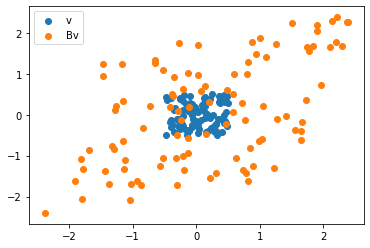

In [38]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5
#V = #COMPLETAR
BV = B@V

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [59]:
def vector_condicion(M, N):       
    v = np.zeros(N)

    for k in range(1,N+1):
        MTemp = M(k)
        v[k-1] = np.linalg.cond(MTemp[0:k,0:k])

    return v

In [66]:
l = list(range(1,10))
print(l)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


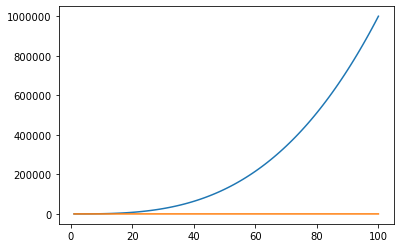

In [72]:
n= 100
x= np.arange(1,n+1)
yA= vector_condicion(matriz_A,n)
yB= vector_condicion(matriz_B,n)

plt.plot(x, yA)
plt.plot(x, yB)
plt.show()

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (c) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

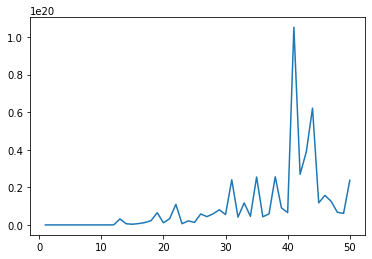

In [73]:
n= 50
x= np.arange(1,n+1)
y= vector_condicion(matriz_H,n)

plt.plot(x, y)
plt.show()

## Ejercicio 3 (Ej 20 - Práctica 2)

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [76]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 4/5]])

s = np.sum(A,axis=0)
print(np.amax(s))

3.0


(a) Calcular $Cond_\infty(A)$.


In [79]:
def k_inf(M):
    max_s = np.amax(np.sum(M, axis=0))
    return max_s

print(k_inf(A))
        

3.0


(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)?



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR